## Standard (Fully Connected) Neural Network
This code demonstrates use of fully connected networks, for the problem of handwritten digit classification. The dataset used is called MNIST. This notebook is a slightly modified version of the notebook provided at https://github.com/husnainfareed/MNIST-Handwritten-Digit-Recognition 


#### Loading Required packages and Data

In [1]:
###1. Load Data and Splot Data
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
import keras
import keras.layers as layers
from keras.utils import np_utils
from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

Using TensorFlow backend.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Let us look at the data
print(X_train.shape)
# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))
X_train, y_train = shuffle(X_train, y_train)

(55000, 28, 28, 1)
Updated Image Shape: (32, 32, 1)


#### Preprocessing

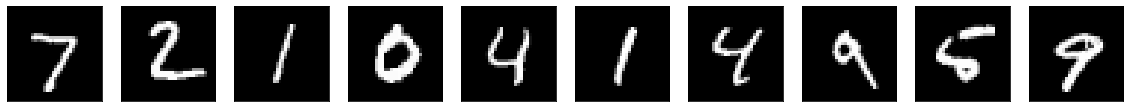

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [4]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, y_train.shape))
#X_train = X_train.reshape(60000, 784)     
#X_test = X_test.reshape(10000, 784)
#X_train = X_train.astype('float32')     
#X_validation = X_validation.astype('float32')     
#X_test = X_test.astype('float32')     
#X_train /= 255    
#X_test /= 255
classes = 10
y_train = np_utils.to_categorical(y_train, classes)     
y_test = np_utils.to_categorical(y_test, classes)
y_validation = np_utils.to_categorical(y_validation, classes)
print("New X_train shape: {} \nNew y_train shape:{}".format(X_train.shape, y_train.shape))

Previous X_train shape: (55000, 32, 32, 1) 
Previous Y_train shape:(55000,)
New X_train shape: (55000, 32, 32, 1) 
New y_train shape:(55000, 10)


#### Setting up parameters

In [5]:
EPOCHS = 10
BATCH_SIZE = 128
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

#### Building the FCN Model

In [6]:
###4.Build the model
model = Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dens

#### Training The Model

In [7]:
#X_trainp = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# Fitting on Data
#history = model.fit(X_train, Y_train,  validation_data=(X_test, Y_test), batch_size=batch_size, epochs=30, verbose=2)
###5.Test 
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
429/429 [==============================] - 5s 12ms/step - loss: 0.4204 - acc: 0.8792 - val_loss: 0.1265 - val_acc: 0.9641
Epoch 2/10
429/429 [==============================] - 2s 5ms/step - loss: 0.1131 - acc: 0.9658 - val_loss: 0.0805 - val_acc: 0.9733
Epoch 3/10
429/429 [==============================] - 2s 5ms/step - loss: 0.0768 - acc: 0.9758 - val_loss: 0.0641 - val_acc: 0.9791
Epoch 4/10
429/429 [==============================] - 2s 5ms/step - loss: 0.0609 - acc: 0.9809 - val_loss: 0.0505 - val_acc: 0.9844
Epoch 5/10
429/429 [==============================] - 2s 5ms/step - loss: 0.0530 - acc: 0.9837 - val_loss: 0.0437 - val_acc: 0.9871
Epoch 6/10
429/429 [==============================] - 2s 5ms/step - loss: 0.0445 - acc: 0.9861 - val_loss: 0.0467 - val_acc: 0.9854
Epoch 7/10
429/429 [==============================] - 2s 5ms/step - loss: 0.0385 - acc: 0.9874 - val_loss: 0.0476 - val_acc: 0.9858
Epoch 8/10
429/429 [=======

#### Testing The Model

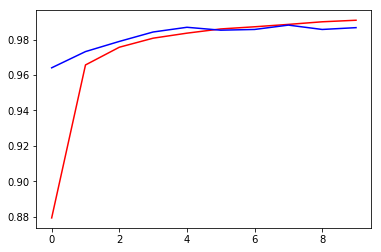

In [8]:
plt.plot(history.history['acc'],color = 'red')
plt.plot(history.history['val_acc'],color = 'blue')



In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [28]:
w = model.get_weights()

array([-0.02068285, -0.01557219, -0.00163742, -0.00243635, -0.03156708,
       -0.00123578], dtype=float32)

In [ ]:
# Looking at some of the mistakes
y_pred = model.predict_classes(X_test)
g = np.argmax(y_test,axis = 1)
ind = np.array(np.where(g != y_pred))
k = ind[0,2]
plt.imshow(X_test[k].reshape(32, 32))
print(g[k])
print(y_pred[k])
